In [3]:
import numpy as np
import torch
import nibabel as nib
from patchify import patchify
import matplotlib.pyplot as plt
import os
from scipy.ndimage import zoom



In [4]:
from data_loader import data_loader, _data_loader, standardiser
from utils.unet_utils import aug_utils

ModuleNotFoundError: No module named 'utils'

In [2]:
raw_path = "../data/raw/"
seg_path = "../data/seg/"

In [15]:
d_loader = data_loader(raw_path, seg_path, (128,128,52), (64,64,64), 50)

for idx, (img, msk) in enumerate(d_loader):
    aa = img
    bb = msk
    if idx == 33:
        break

# (aa)bb.shape == torch.Size([1, 64, 64, 64])

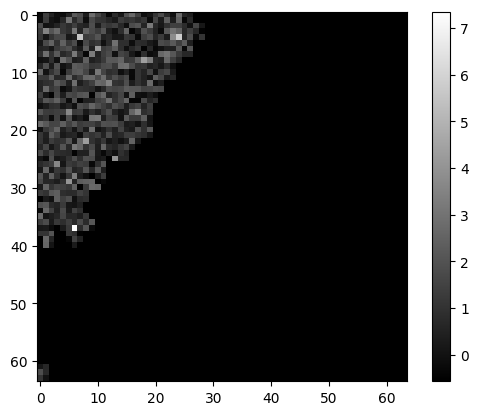

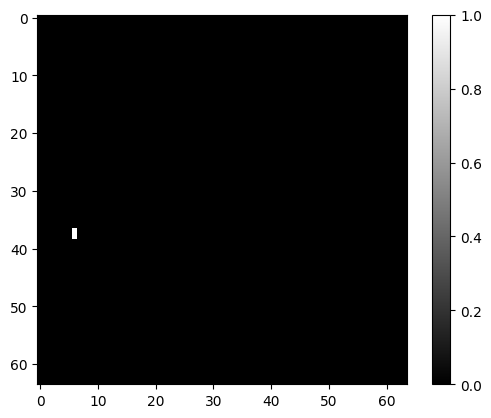

In [22]:
slice_num = 63
plt.figure()
plt.imshow(aa[0,:,:,slice_num], cmap='gray')
plt.colorbar()
plt.figure()
plt.imshow(bb[0,:,:,slice_num], cmap='gray')
plt.colorbar()

In [ ]:
raw_file_list = os.listdir(raw_path)
seg_file_list = os.listdir(seg_path)
raw_arr = nib.load(raw_path+raw_file_list[0]).get_fdata() # (1090*1280*52)
seg_arr = nib.load(seg_path+seg_file_list[0]).get_fdata()


In [ ]:
print(raw_arr.shape)
print(seg_arr.shape)

In [ ]:
raw_patches = patchify(raw_arr, (128,128,52), 10)
seg_patches = patchify(seg_arr, (128,128,52), 10)
seg_patches.shape

In [ ]:
new_raw = raw_patches[33,33,0,:,:,:]
new_seg = seg_patches[33,33,0,:,:,:]

In [ ]:
new_raw_std = standardiser(new_raw)

In [ ]:
test_aug = aug_utils((64,64,64))
test_raw, test_seg = test_aug(new_raw_std, new_seg)

In [ ]:
np.unique(test_seg)

In [ ]:
slice_num = 63
plt.figure()
plt.imshow(test_raw[:,:,slice_num], cmap='gray')
plt.colorbar()
plt.figure()
plt.imshow(test_seg[:,:,slice_num], cmap='gray')
plt.colorbar()



In [ ]:
raw_img = raw_path+raw_file_list[0]
seg_img = seg_path+seg_file_list[0]
print(raw_img, seg_img)

In [ ]:
raw_arr = nib.load(raw_img).get_fdata() # (1080*1280*52)
seg_arr = nib.load(seg_img).get_fdata()

In [ ]:
new_raw, new_seg = aug(raw_arr,seg_arr,64)
new_raw = new_raw[64:1024, 64:1216, :]
new_seg = new_seg[64:1024, 64:1216, :]

In [ ]:
# test rotation
test_aug = aug_utils(new_raw)
new_raw_out = test_aug.forward()

In [ ]:
#test standardisation
new_raw_std = standardiser(new_raw_out)


In [ ]:
plt.figure()
plt.imshow(new_raw_out[:,:,13], cmap='gray')
plt.figure()
plt.imshow(new_raw_std[:,:,13], cmap='gray')
plt.figure()
plt.imshow(new_seg[:,:,13], cmap='gray')

In [ ]:
print(raw_arr.shape)

In [ ]:
gen = data_loader(raw_img, seg_img, (64,64,64), 64)

input_img, input_msk = next(gen)
print(input_img.shape, input_msk.shape)

In [ ]:
if torch.max(input_msk) == 1:
    print("yes")
else:
    print("no")

In [ ]:
step_num = len(list(gen))
patch_gen = data_loader(raw_img, seg_img, (64,64,64), 64)
for step in range(step_num):
    input_img, input_msk = next(patch_gen)
    if torch.max(input_msk) == 1:
        break
    
print("finished")

In [ ]:
input_img.shape

In [ ]:
np.unique(input_msk)

In [ ]:
input_img = input_img[0,:,:,0:52]
input_msk = input_msk[0,:,:,0:52]
print(input_img.shape)
print(np.unique(input_msk))

In [ ]:
def zooming(img, msk, shape):
    """
    :params img: input 3D image
    :params msk: imput 3D mask
    :params shape: expected shape of data (3-element-tuple)

    Default order of the spline interpolation is set to 0
    inplace = True
    """
    img = zoom(img, (64 / shape[0], 64 / shape[1], 64 / shape[2]), order=1, mode='mirror')
    msk = zoom(msk, (64 / shape[0], 64 / shape[1], 64 / shape[2]), order=1, mode='mirror')

    return img , msk

In [ ]:
# test zooming
aa, bb = zooming(input_img, input_msk, (64,64,52))

In [ ]:
aa.shape

In [ ]:
print(np.unique(bb[:,:,60]))

In [ ]:
slice_num = 59
plt.figure()
plt.imshow(input_img[:,:,slice_num], cmap='gray')
plt.colorbar()
plt.figure()
plt.imshow(input_msk[:,:,slice_num], cmap='gray')
plt.colorbar()

In [ ]:
test_input = np.ones([52,52,52])
test_input.shape

In [ ]:
test_input = test_input[None, :]
test_input.shape

In [ ]:
test_input = torch.from_numpy(test_input).to(torch.float32)
test_input = test_input.unsqueeze(0)
print(test_input.shape)

In [ ]:
plt.figure()
plt.imshow(new_raw[:,:,52], cmap='gray')
plt.figure()
plt.imshow(new_seg[:,:,52], cmap='gray')

In [ ]:
# test gen
class Iterable(object):
    def __init__(self, numbers):
        self.numbers = numbers

    def __iter__(self):
        n = self.numbers
        for i in range(n):
            yield i*i, 2*i

iterable = Iterable(5)

for y in range(2):
    for idx, (i, j) in enumerate(iterable): # iterator created here

        print(idx, i, j)
        if idx == 3:
            break



In [ ]:
cc = [1,0,2,0,3,0,4,0,5]

for item in cc :
    if item != 0:
        print(item)
    else:
        continue